**Tugas 1 Bimbingan Karir Data Science**

Nama : Ailsa Nurina Cahyani

NIM : A11.2020.12636

Kelas : BKDS01 - Data Scientist

# 1) Pengumpulan Data

Pada projek ini menggunakan dataset yang bersumber dari UCI Machine Learning yaitu Heart Disease. Dataset yang dipakai adalah dataset dengan nama file "Hungarian.data".

# 2) Menelaah Data

Langkah kedua yaitu memasukkan beberapa library yang dibutuhkan untuk menelaah data.

In [1]:
import pandas as pd # Untuk analisis data dalam Python
import re # Regular Expression untuk pemrosesan string berdasarkan pola tertentu
import numpy as np # Untuk pemrosesan numerik dalam Python
import itertools # Merupakan library yang menyediakan berbagai fungsi untuk melakukan operasi pada objek iterasi

- Fungsi pandas untuk menyediakan struktur data yang efisien dan mudah digunakan, terutama dalam bentuk DataFrames. Memungkinkan untuk pemrosesan, manipulasi, dan analisis data yang fleksibel dan kuat. Dapat membaca dan menulis data dari berbagai format file, membersihkan dan mengubah format data, menggabungkan data, serta melakukan operasi statistik.

- Fungsi re untuk mencocokan, mencari, dan memanipulasi teks menggunakan ekspresi reguler.

- Numpy menyediakan struktur data array multimensi yang efisien dan berbagai fungsi matematika.

- itertools berfungsi untuk permutasi, kombinasi, dan pengulangan.

**Load Data**

Terdapat 2 cara untuk memasukkan data ke dalam Colab. Cara pertama yaitu melalui platform colab secara langsung. Kelemahannya adalah jika runtime terputus, kita harus memasukkan kembali dataset ke Colab.

In [2]:
# Cara1
#dir adalah variabel yang digunakan untuk menyimpan data dengan path dari google colan
# dir = 'hungarian.data'
# dri = '/content/drive/My Drive/BK Ganjil 2023/Dataset/hungarian.data'

Cara kedua adalah memanggil dataset dari Google Drive. Hal ini dapat dilakukan dengan cara memasukkan dataset ke dalam drive pribadi. Kemudian menghubungkan Google Drive dengan Colab. Langkah pertama yaitu mengimpor modul "drive" dari library "google.colab". Kemudian langkah kedua adalah menggunakan fungsi "mount" untuk menghubungkan kedua platform. Dan langkah ketiga adalah memberikan path "/content/gdrive" sebagai tempat penyimpanan Google Drive di dalam Colab.

In [3]:
# Cara2
# Dari Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Setelah Colab terhubung dengan Google Drive, langkah selanjutnya adalah membuat variabel yang digunakan untuk menampung path dari file dataset yang akan digunakan, yaitu file 'hungarian.data'.

In [4]:
dir = '/content/gdrive/MyDrive/heart disease/hungarian.data'
# dir merupakan variabel yang menampung path dari file 'hungarian.data'yang terletak di dalam direktori 'heart disease'

Setelah file dipanggil, langkah selanjutnya adalah membuat iterasi yang  berfungsi untuk membaca dataset. Berikut langkah untuk membaca dan melabel 10 baris pertama dari file 'hungarian.data':

In [5]:
# Melabel 10 baris pertama
with open(dir, encoding='Latin1') as file: # untuk mmebuka file yang diarahkan oleh variabel dir
# Setiap baris dalam file dibaca dan disimpan dalam list 'lines'
  lines = [line.strip() for line in file]

lines[0:10] # Mengambil 10 baris pertama dari list lines dan mencetaknya

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

Fungsi line.strip() digunakan untuk menghapus karakter kosong pada awal dan akhir setiap baris.

Setelah melabel 10 baris pertama, langkah selanjutnya adalah membentuk DataFrame.

In [6]:
data = itertools.takewhile( # untuk mengambil baris-baris data yang memenuhi kriteria panjangnya adalah 76 karakter (fitur)
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data) # fungsi ini mengonversi data yang diperoleh dari data menjadi DataFrame dengan kolom-kolom yang sesuai

df.tail() # Untuk mencetak 5 baris terakhir dari DataFrame yang dibentuk

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
289,1053,0,48,0,0,0,0,-9,2,-9,...,-9,-9,1,1,1,1,1,-9.,-9.,name
290,1054,0,36,1,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
291,5001,0,48,1,0,0,0,-9,3,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
292,5000,0,47,0,0,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
293,5002,0,53,1,1,1,1,-9,4,130,...,1,1,1,1,1,1,1,-9.,-9.,name


Fungsi **(' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))** digunakan untuk mengambil data dari lines. Fungsinya untuk menggabungkan 10 baris data menjadi satu string dengan spasi sebagai pemisah. Kemudian membaginya menjadi kata-kata menggunakan **.split()**. Hanya baris-baris data yang memenuhi panjang 76 karakter yang diambil.

In [7]:
df.info() # Untuk menampilkan informasi tentang DataFrame df.
# Informasi ini termasuk jumlah baris dan kolom, tipe data dari setiap kolom, serta jumlah nilai non-null yang ada di setiap kolom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Output dari df.info() akan mencakup :
- Jumlah total baris dalam DataFrame
- Daftar kolom beserta jumlah nilai non-null yang ada di setiap kolom
- Tipe data dari setiap kolom
- Jumlah memori yang digunakan oleh DataFrame

Untuk nilai null disimbolkan dengan angka -9.0 dan terlihat bahwa kondisi dataset yang digunakan terdapat kondisi khusus. Maka perlu dilakukan penghapusan fitur.

In [8]:
df = df.iloc[:,:-1] # Untuk memilih semua baris dan kolom kecuali kolom terakhir dari DataFrame df
df = df.drop(df.columns[0], axis=1) # Untuk menghapus kolom pertama dari DataFrame df

- **iloc** digunakan untuk memilih berdasarkan posisi indeks,
- **:,:** digunakan untuk memilih semua baris
- **:-1** digunakan untuk memilih semua kolom kecuali yang terakhir
- **df.columns[0]** digunakan untuk mengidentifikasi kolom pertama berdasarkan nama kolom
- **axis=1** digunakan untuk menunjukkan bahwa penghapusan dilakukan pada sumbu kolom.

Selanjutnya adalah mengubah tipe data menjadi float agar sesuai dengan nilai null yaitu -9.0

In [9]:
df = df.astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# 3) Validasi Data

Validasi data bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya.

Langkah ini bertujuan mengubah nilai -9.0 menjadi nilai null sesuai dengan deskripsi dataset

In [11]:
df.replace(-9.0, np.nan, inplace=True) # Mengganti nilai -9.0 menjadi NaN(Not a Number)

- **df.replace()** untuk mengganti nilai

- **-9.0** adalah nilai yang ingin diganti

- **np.nan** adalah nilai pengganti yang ditetapkan sebagai NaN

- **inplace=True** untuk mengganti nilai secara langsung di dalam DataFrame df

Langkah selanjutnya adalah menghitung jumlah nilai null

In [12]:
df.isnull().sum() # Untuk menghitung jumlah nilai NaN pada setiap kolom

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

- df.isnull() untuk menghasilkan DataFrame boolean dengan nilai True pada setiap sel yang  berisi Nan dan False pada setiap sel yang berisi nilai valid

- .sum() untuk menjumlahkan nilai True (yang mewakili nilai NaN) dalam setiap kolom

Hal ini berguna untuk membantu memahami data yang hilang atau tidak valid dalam setiap kolom. Setelah mengetahui jumlah nilai NaN, langkah selanjutnya dapat dipilih sesuai kebutuhan, seperti mengisi nilai yang hilang, menghapus baris atau kolom dengan banyak nilai NaN, atau melakukan manipulasi data lainnya untuk menangani kekosongan data.

In [13]:
df.head() # untuk menampilkan beberapa baris pertama dari DataFrame df

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


Outputnya adalah menampilkan 5 baris pertama dari DataFrame. Hal ini berfungsi untuk melihat dengan cepat isi dan struktur awal dari DataFrame, membantu dalam pemahaman awal tentang data yang ada.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

# 4) Menentukan Object Data

Langkah selanjutnya adalah memilih fitur-fitur yang akan digunakan dalam proses analisis. Menurut deskripsi dataset yang tertera dalam website uci-heartdisease, fitur yang digunakan adalah 14 fitur.

In [15]:
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]
# Untuk seleksi kolom tertentu dalam DataFrame

- **df_selected** merupakan DataFrame baru yang terbentuk dan akan terdiri dari kolom-kolom yang telah dipilih tersebut

- **df.iloc** untuk memilih berdasarkan posisi indeks

- **:** untuk memilih semua baris

- **[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]** untuk memilih kolom-kolom yang diinginkan berdasarkan posisi indeks kolom

In [16]:
df_selected.head() # Menampilkan 5 baris awal untuk DataFrame baru yang berisi kolom-kolom yang telah dipilih
df_selected.tail() # Menampillkan 5 baris akhir untuk DataFrame baru yang berisi kolom-kolom yang telah dipilih

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,NaN,NaN,NaN,0.0


In [17]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Langkah selanjutnya adalah mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset.

Nama dan penempatan dapat dilihat sesuai informasi yang ada pada website UCI HeartDisease

In [18]:
# Pemetaan nama kolom dalam DataFrame
column_mapping = { #berisi pemetaan antara posisi indeks kolom dan nama kolom yang diinginkan
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True) # Untuk mengganti nama kolom DataFrame df_selected berdasarkan pemetaan yang diberikan

<ipython-input-18-ab4cfa0f4846>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True) # Untuk mengganti nama kolom DataFrame df_selected berdasarkan pemetaan yang diberikan


In [19]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Langkah berikutnya adalah menghitung jumlah kemunculan nilai dalam setiap kolom DataFrame

In [20]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

- **value_counts()** untuk melihat frekuensi kemunculan nilai-nilai unik dalam setiap kolom. Biasanya digunakan pada kolom-kolom dengan tipe data kategorikal atau diskrit.

Hal ini digunakan untuk memberikan gambaran tentang distribusi nilai dalam setiap kolom DataFrame. Dengan mengetahui jumlah kemunculan nilai dalam setiap kolom, kita dapat melihat nilai-nilai yang dominan, mengidentifikasi outlier, atau mendapatkan wawasan tentang karakteristik data dalam kolom tersebut.

# 5) Membersihkan Data

Membersihkan data dilakukan sebelum melakukan pemodelan, hal ini bertujuan agar model yang dihasilkan lebih akurat.

Langkah dalam membersihkan data adalah menghitung jumlah null values yang ada di dalam dataset

In [21]:
# Menghitung jumlah nilai NaN
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Dari output di atas dapat disimpulkan bahwa terdapat 3 fitur yang memiliki nilai NaN yang dominan, yaitu 'thal', 'ca', dan 'slope'.

Maka dari itu dilakukan penghapusan ketiga fitur tersebut dengan menggunakan fungsi drop

In [22]:
columns_to_drop = ['ca', 'slope', 'thal'] # berisi nama kolom yang ingin di hapus
df_selected = df_selected.drop(columns_to_drop, axis=1) # fungsi untuk menghapus kolom-kolom tersebut

In [23]:
df_selected.isnull().sum() # menghitung jumlah nilai NaN yang telah diperbarui

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dikarenakan beberapa kolom fitur yang masih memiliki nilai null, maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

Langkah berikutnya adalah menghitung rata-rata dari kolom 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', dan 'exang'

In [24]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

- **.dropna()** berfungsi menghapus nilai NaN dari setiap kolom

- **'meanTBPS', 'meanChol', dst.** berisi rata-rata dari kolom yang terkait setelah menghapus nilai NaN

In [25]:
# Mengubah tipe data kolom menjadi float
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

Tujuan dari mengubah tipe data kolom menjadi float agar dapat digunakan untuk perhitungan statistik atau operasi matematis yang membutuhkan tipe data numerik desimal.

In [26]:
# Menghitung rata-rata bulat dari kolom yang telah dikonversi
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

- **mean()** untuk menghitung rata-rata

- **round()** untuk menjadikan hasil rata-rata ke angka bulat

Langkah selanjutnya mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [27]:
# Mengisi nilai NaN dengan nilai rata-rata pada DataFrame yang dikonversi
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs, 'thalach': meanthalach, 'exang': meanexang, 'restecg': meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

- **fill_values** berisi kolom-kolom yang akan diisi dengan nilai rata-rata yang telah dihitung sebelumnya

- **.fillna()** berfungsi nilai-nilai NaN dalam DataFrame df_selected diisi dengan nilai dari kamus fill_values

In [28]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [29]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Setelah tidak ada nilai NaN pada setiap kolom, langkah selanjutnya melakukan pengecekan terhadap duplikasi data

In [30]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


- **.duplicated()** untuk mengidentifikasi baris-baris yang merupakan duplikat. Metode ini mengembalikan seri boolean yang menandai baris-baris yang memiliki duplikat

In [31]:
# Mencetak semua baris duplikat dalam DataFrame yang telah dibersihkan
print('All Duplicate Rows:') # Menampilkan output 'All Duplicate Rows:'
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [32]:
# menghapus duplikat baris dan memeriksa kembali duplikat dalam DataFrame yang telah dibersihkan
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


- **.drop_duplicates()** untuk menghapus baris-baris yang merupakan duplikat

In [33]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [34]:
# Menghitung jumlah kemunculan nilai dalam kolom 'target' pada DataFrame yan telah dibersihkan
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

**EDA**

In [35]:
import seaborn as sns # untuk visualisasi data statistik yang lebih menarik dan informatif
import matplotlib.pyplot as plt # untuk membuat plot dan visualisasi data

Langkah yang dilakukan adalah menghitung korelasi antara kolom-kolom dalam DataFrame yang telah dibersihkan

In [36]:
dfClean.corr() #menghasilkan DataFrame korelasi yang berisi nilai korelasi antara setiap pasangan kolom numerik

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

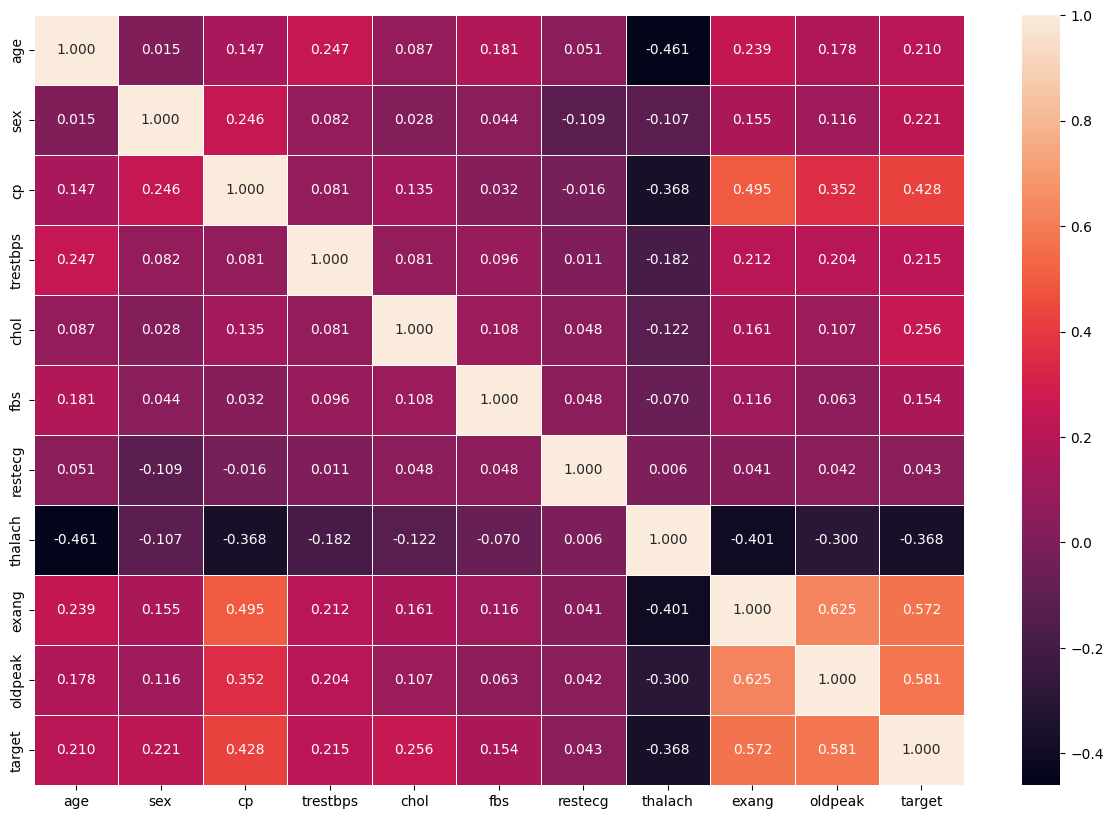

In [37]:
# Membuat heatmap korelasi
cor_mat = dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f")

- **cor_mat** berisi matriks korelasi hasil dari perhitungan .corr() pada DataFrame dfClean

- **plt.subplots(figsize=(15,10))** untuk mengatur ukuran gambar yang akan ditampilkan

- **sns.heatmap()** untuk pembentukan heatmap dengan menggunakan cor_mat sebagai data yang akan divisualisasikan

- **annot=True** merupakan parameter yang digunakan untuk menampilkan nilai korelasi pada heatmap

- **linewidhts=0.5** untuk mengatur ketebalan garis antara sel heatmap

- **fmt=".3f"** untuk memformat tampilan nilai korelasi menjadi tiga angka di belakang koma

Heatmap digunakan untuk memberikan gambaran visual yang jelas tentang hubungan korelasi antara variabel-variabel dalam dataset.

# 6) Konstruksi Data

Konstruksi data memiliki tujuan untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada tahap ini, dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali.

In [38]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [39]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah tipe dataset kita sesuai, langkah berikutnya adalah memisahkan antara fitur dan target, lalu simpan ke dalam variabel

In [40]:
X = dfClean.drop("target", axis=1).values # menghapus kolom 'target'
y = dfClean.iloc[:,-1] # mengambil kolom 'target'

Langkah selanjutnya adalah mengecek persebaran jumlah target

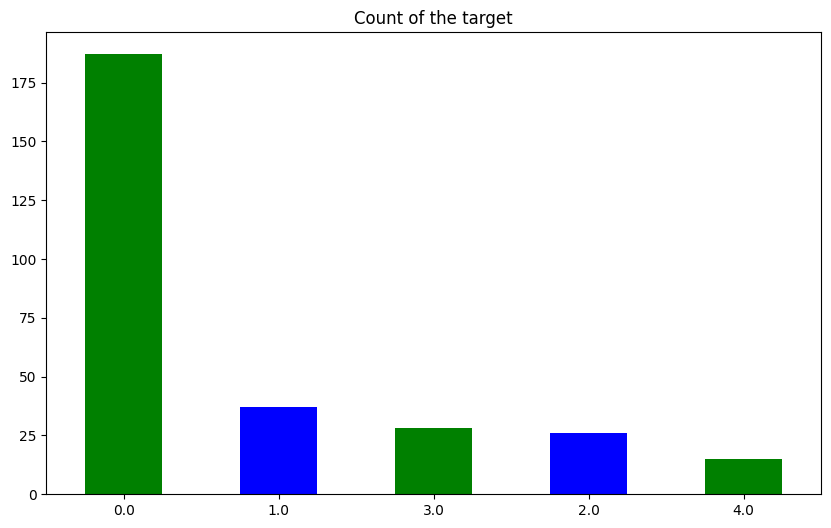

In [41]:
# Membuat Plot Bar pada kolom Target
dfClean['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue'])
plt.title("Count of the target") # menambahkan judul
plt.xticks(rotation=0); # mengatur rotasi label sumbu x menjadi 0 derajat

Dapat dilihat pada grafik di atas menunjukkan bahwa persebaran jumlah target adalah imbalance (tidak seimbang). Maka kita perlu menyeimbangkannya.

Terdapat 2 cara yang dapat dilakukan, yaitu oversampling dan undersampling. Oversampling dilakukan jika jumlah dataset sedikit, sedangkan undersampling dilakukan jika jumlah data terlalu banyak.

Untuk mengatasi dataset kita yang tidak seimbang, maka akan dilakukan teknik oversampling karena jumlah data tidak banyak. Salah satu metode oversampling yang akan digunakan adalah **SMOTe**

In [42]:
# Mengimpor modul SMOTE
from imblearn.over_sampling import SMOTE

In [43]:
# Oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

- **.fit_resample()** dilakukan oversampling pada dataset fitur X dan target y. Hal ini akan menghasilkan dataset yang telah di oversampling, di mana jumlah sampel dari kelas minoritas akan ditingkatkan untuk mencapai keseimbangan dengan kelas mayoritas.

- **X_smote_resampled** untuk fitur dan **y_smote_resampled** untuk target dari dataset yang telah dioversampling

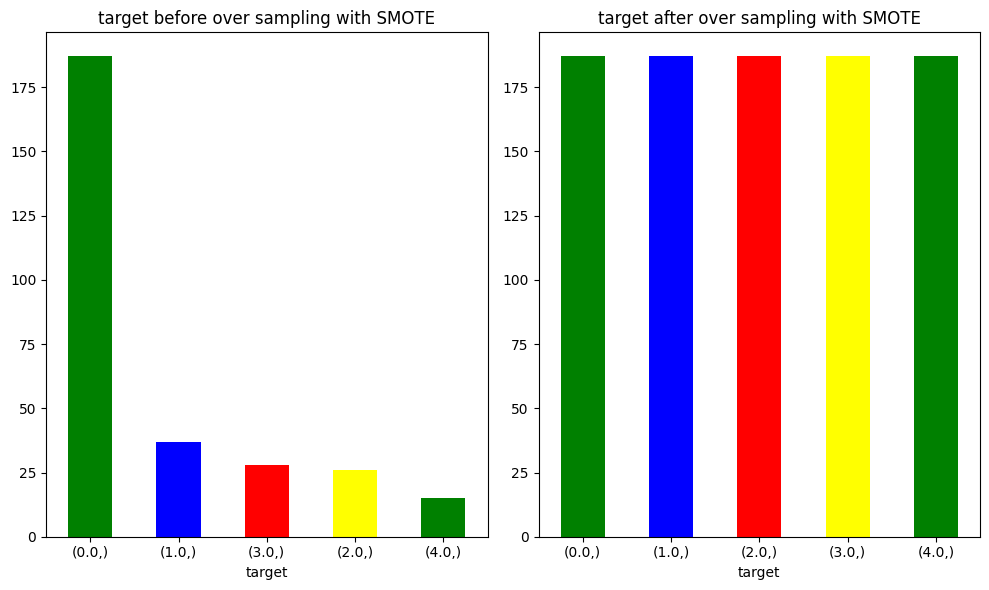

In [44]:
# Membuat plot perbandingan jumlah kemunculan nilai target sebelum dan sesudah oversampling dengan SMOTe
plt.figure(figsize=(12,4)) # Membentuk figure dengan ukuran gambar 12x4

new_df1 = pd.DataFrame(data=y) # membentuk DataFrame yang berisi data target y

plt.subplot(1, 2, 1) # Pembentukan subplot pertama dengan tata letak 1 baris dan 2 kolom, dan memilih subplot pertama sebagai subplot saat ini
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target before over sampling with SMOTE") # judul untuk subplot pertama
plt.xticks(rotation=0);

plt.subplot(1, 2, 2) # pembentukan subplot kedua dengan tata letak 1 baris dan 2 kolom dan memilih subplot kedua sebagai subplot saat ini
new_df2 = pd.DataFrame(data=y_smote_resampled) # berisi data target hasil oversampling dengan SMOTe

new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target after over sampling with SMOTE") # judul untuk subplot kedua
plt.xticks(rotation=0);

plt.tight_layout() # pengaturan tata letak plot agar lebih rapi
plt.show() # Menampilkan plot yang telah dibuat

Dapat dilihat bahwa target yang sebelumnya belom seimbang, setelah dilakukan teknik SMOTE menjadi seimbang

In [45]:
# Jumlah data target sebelum dilakukan SMOTe
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [46]:
# over
# Jumlah data target setelah dilakukan SMOTe
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Setelah persebaran jumlah target seimbang, maka perlu dilakukan pengecekan apakah perlu dilakukan normalisasi/standarisasi pada dataset.

In [47]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi yang ditampilkan di atas, terlihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang dimiliki. Oleh karena itu, perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom

In [48]:
# Normalisasi data fitur menggunakan Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

MinMaxScaler adalah salah satu metode normalisasi yang digunakan untuk mengubah skala nilai fitur menjadi rentang yang ditentukan (umumnya 0 hingga 1)

- **.fit_transform()** akan melakukan perhitungan dan transformasi pada dataset fitur untuk mengubahnya menjadi skala yang sesuai

- **X_smote_resampled_normal** untuk menyimpan hasil

In [49]:
# Menghitung jumlah sampel dalam Dataset Fitur setelah dinormalisasi dengan Min-Max Scaler
len(X_smote_resampled_normal)

935

- fungsi **len()** untuk menghitung panjang atau jumlah elemen dalam suatu objek, dalam hal ini jumlah sampel dalam dataset fitur yang telah dinormalisasi

In [50]:
# Membuat DataFrame dari dataset fitur yang telah dinormalisasi dan menghasilkan statistik
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah normalisasi pada fitur dilakukan, langkah selanjutnya adalah membagi fitur dan target menjadi data train dan test

In [51]:
from sklearn.model_selection import train_test_split

- fungsi **train_test_split** untuk membagi dataset menjadi subset pelatihan (training set) dan subset pengujian (testing set) secara acak

Hal ini berarti, training set untuk melatih model dan testing set untuk menguji kinerja model

In [52]:
# Membagi fitur dan target menjadi data train dan test (Untuk yang oversampling saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

- **test_size=0.2** untuk mengatur proporsi subset pengujian menjadi 20% dari keseluruhan dataset oversampling

- **random_state=42** untuk mengontrol pembagian dataset secara acak agar dapat direproduksi

- **stratify=y_smote_resampled** untuk memastikan distribusi kelas pada subset pelatihan dan pengujian tetap seimbang

In [53]:
# Membagi fitur dan target menjadi data train dan test (untuk yang oversampling + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# 7) Model

Setelah melakukan langkah 1 - 6, langkah selanjutnya adalah membangun model.

In [54]:
# Fungsi yang akan dipanggil di setiap model

# Mengimpor modul yang diperlukan dari library scikit-learn
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

# Fungsi evaluation digunakan untuk melakukan evaluasi model dengan menggunakan beberapa metrik evaluasi yang umum digunakan
def evaluation(Y_test, Y_pred):
  acc = accuracy_score(Y_test, Y_pred)
  rcl = recall_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  ps = precision_score(Y_test, Y_pred, average='weighted')

  metric_dict={'accuracy': round(acc, 3),
               'recall': round(rcl, 3),
               'F1 score': round(f1, 3),
               'Precision score': round(ps, 3)
               }

  return print(metric_dict)

- **Y_test** -> target aktual

- **Y_pred** -> target yang diprediksi oleh model

- Metrik evaluasi yang dihitung:
1. **accuracy_score** -> Menghitung akurasi model
2. **recall_score** -> Menghitung recall (sensitivitas) model dengan opsi **average='weighted'** untuk menghitung rata-rata berdasarkan jumlah sampel dalam setiap kelas
3. **f1_score** -> Menghitung F1 score (harmonik rata-rata presisi dan recall)
4. **precision_score** -> Menghitung presisi model.

- **metric_dict** -> menyimpan hasil metrik evaluasi

Saya akan membangun model KNN, Random Forest, dan XGBoost menggunakan SMOTE

# KNN

KNN akan dibangun dengan nilai neighbors yaitu 3.

In [55]:
# Mengimport modul dari library scikit-learn dan XGBoost
from sklearn.neighbors import KNeighborsClassifier #Implementasi dari algoritma KNN untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier #Implementasi dari algoritma RF untuk klasifikasi
from xgboost import XGBClassifier  #Implementasi dari algoritma XGBoost untuk klasifikasi
from sklearn.metrics import accuracy_score, classification_report #Untuk menghitung akurasi dan menghasilkan laporan klasifikasi

In [56]:
# Membuat objek model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- **knn_model** -> objek model

- **n_neighbors=3** -> untuk mengatur jumlah tetangga terdekat yang akan digunakan dalam proses klasifikasi

- **metode fit()** dari objek model knn_model untuk melatih model menggunakan data latih (X_train) dan target latih (y_train)

In [57]:
# Melakukan prediksi menggunakan KNN
y_pred_knn=knn_model.predict(X_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) model:")
accuracy_knn_smote=round(accuracy_score(y_test, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



- **metode predict()** -> untuk melakukan prediksi pada data uji (X_test). Hasil prediksi disimpan dalam variabel y_pred_knn

- **accuracy_score()** -> Menghitung akurasi model KNN. Hasil akurasi dibulatkan menjadi 3 desimal dan disimpan dalam variabel accuracy_knn_smote.

Dapat dilihat bahwa hasil akurasi saat prediksi menggunakan algoritma KNN adalah 0.754.

In [58]:
# Memanggil fungsi evaluation
evaluation(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


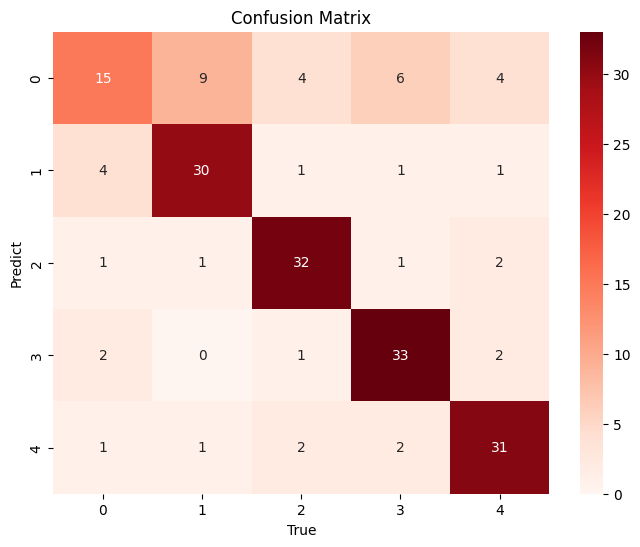

In [59]:
# Membuat confusion matrik model KNN
cm=confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel("True")
plt.ylabel('Predict')
plt.show()

# Random Forest

Model kedua yang akan dibangun adalah Random Forest dengan nilai estimators yaitu 100. Hal ini berguna untuk mengatur jumlah pohon keputusan (Decision tree) yang akan dibangun.

In [60]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Melakukan prediksi dengan RF
y_pred_rf = rf_model.predict(X_test)

#Evaluasi Model Random Forest
print("\nRandom Forest Model: ")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote)
print("Classification Report: ")
print(classification_report(y_test, y_pred_rf))


Random Forest Model: 
Accuracy: 0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [62]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


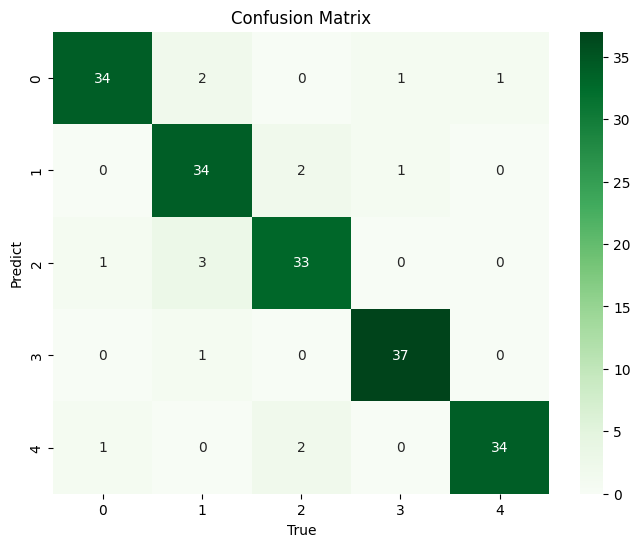

In [63]:
# Membuat Confusion Matrix Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBoost

Selanjutnya adalah membangun model menggunakan XGBoost. XGBoost atau Extreme Gradient Boosting merupakan sebuah algoritma Machine Learning yang popular dan kuat yang digunakan untuk regresi dan klasifikasi. XGBoost adalah implementasi yang dioptimalkan dari algoritma Gradient Boosting yang menggunakan ensemble learning dengan menggunakan pohon keputusan (Decision Tree) sebagai model dasarnya.

Akan digunakan learning rate yaitu 0.1 dan n_estimators = 100

In [64]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
# melakukan prediksi dengan XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi Model XGBoost
print("\nXGBoost Model: ")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb), 3)
print("Accuracy: ", accuracy_xgb_smote)
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model: 
Accuracy:  0.904
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [66]:
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


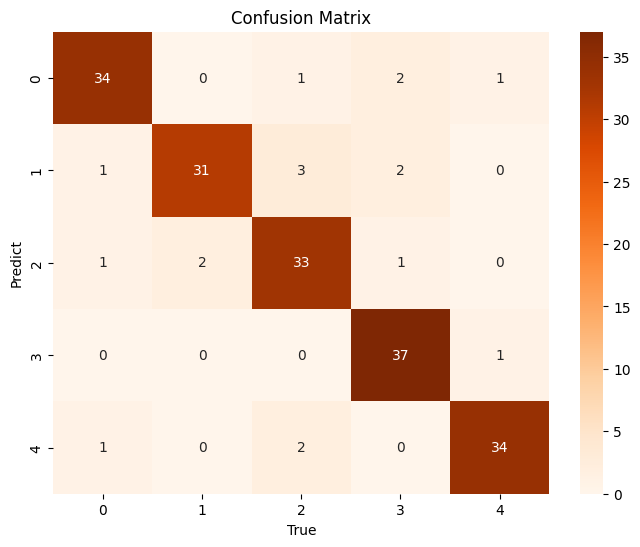

In [67]:
# membuat confusion matriks XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title('Confusion Matrix')
plt.xlabel("True")
plt.ylabel('Predict')
plt.show()

# Oversample + Normalisasi

Setelah sebelumnya membangun model KNN, Random Forest, dan XGBoost dengan data yang sudah di oversample. Selanjutnya akan dibangun model KNN, Random Forest, dan XGBoost dengan data yang sudah dilakukan oversample dan normalisasi.

# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [69]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [70]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluasi Model KNN
print("K-Nearest Neighbors (KNN) Model: ")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy: ", accuracy_knn_smote_normal)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model: 
Accuracy:  0.754
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



Dibagian sini tidak terjadi perubahan:(

In [71]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


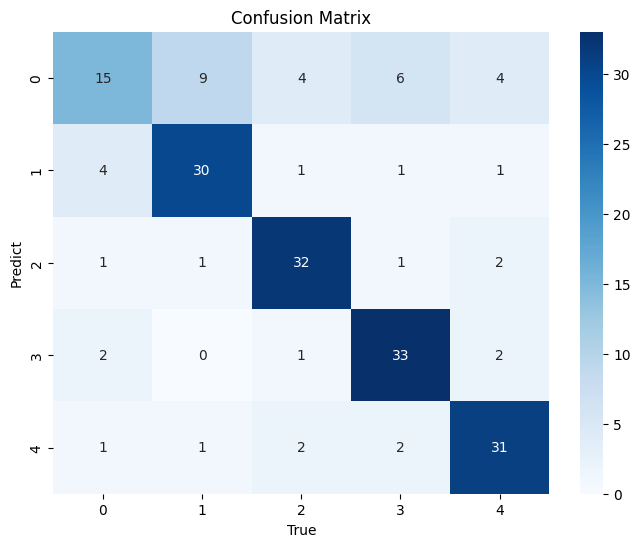

In [72]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel("True")
plt.ylabel('Predict')
plt.show()

# Random Forest

In [73]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [74]:
y_pred_rf = rf_model.predict(X_test_normal)

#Evaluasi Model Random Forest
print("\nRandom Forest Model: ")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy: ", accuracy_rf_smote_normal)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model: 
Accuracy:  0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [75]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


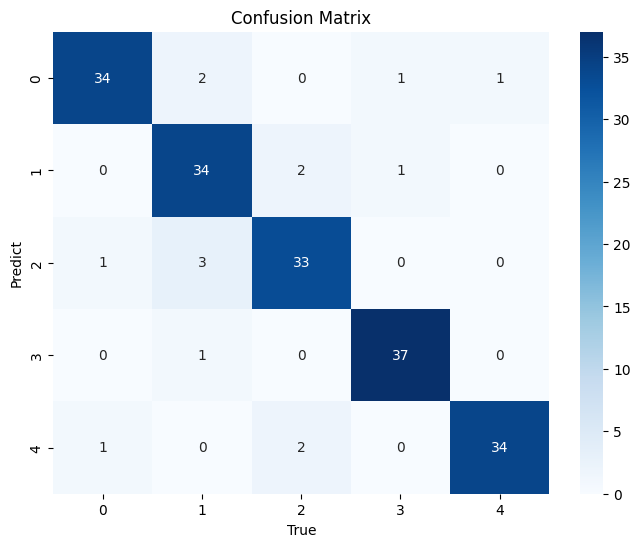

In [76]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBoost

In [77]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [78]:
y_pred_xgb = xgb_model.predict(X_test_normal)

#Evaluasi Model XGBoost
print("\nXGBoost Model: ")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy: ", accuracy_xgb_smote_normal)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model: 
Accuracy:  0.904
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [79]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


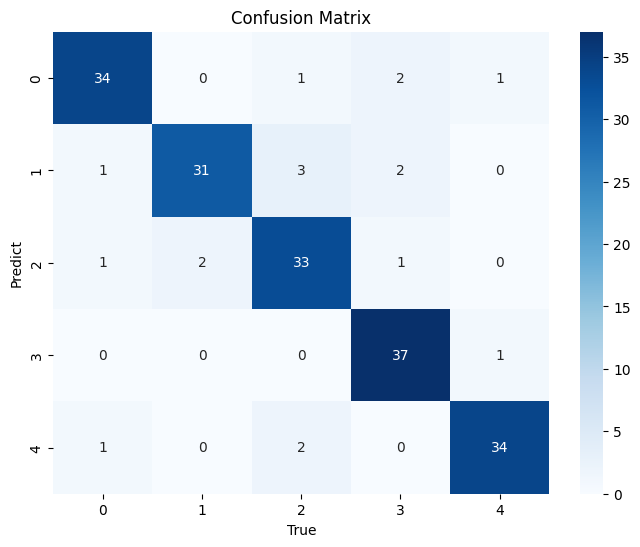

In [80]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel("True")
plt.ylabel('Predict')
plt.show()

# Tunning + Normalization + Oversample

Selanjutnya akan dibangun model KNN, Random Forest, dan XGBoost menggunakan data yang sudah di oversample, normalization, dan tunning.

Tunning atau pengaturan ulang adalah proses mengoptimalkan parameter-parameter atau hiperparameter dalam sebuah model machine learning untuk mencapai kinerja yang lebih baik. Tujuan dari tuning yaitu untuk meningkatkan kualitas model dengan mengatur parameter-parameter yang mempengaruhi performa model.

# KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Untuk proses tuning pada KNN menggunakan **RandomizedSearchCV**

In [82]:
# Membuat objek model KNN
knn_model = KNeighborsClassifier()

# Menentukan ruang parameter
param_grid={
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

# Membuat objek RandomizedSearchCV
knn_model = RandomizedSearchCV(estimator = knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

# Melakukan tuning
knn_model.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 6, 'metric': 'manhattan', 'leaf_size': 28, 'algorithm': 'ball_tree'}


- **n_neighbors** -> jumlah tetangga
- **metric** -> metrik jarak
- **leaf_size** -> ukuran leaf dalam pohon
- **n_iter** -> jumlah iterasi pencarian acak
- **scoring** -> metrik evaluasi untuk memilih model terbaik
- **cv** -> jumlah lipatan dalam validasi silang

Dari hasil di atas ditemukan parameter terbaik, yaitu:
1. Bobot -> distance
2. Jumlah tetangga -> 6
3. Metrik jarak -> manhattan
4. Ukuran leaf -> 28
5. algorithm -> ball_tree

In [83]:
y_pred_knn = knn_model.predict(X_test_normal)

#Evaluasi Model KNN
print("K-Nearest Neighbors (KNN) Model: ")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_knn),3)
print("Accuracy: ", accuracy_knn_smote_normal_Tun)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model: 
Accuracy:  0.781
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.39      0.55        38
         1.0       0.74      0.84      0.78        37
         2.0       0.82      0.84      0.83        37
         3.0       0.71      0.92      0.80        38
         4.0       0.83      0.92      0.87        37

    accuracy                           0.78       187
   macro avg       0.80      0.78      0.77       187
weighted avg       0.80      0.78      0.77       187



In [84]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.781, 'recall': 0.781, 'F1 score': 0.766, 'Precision score': 0.796}


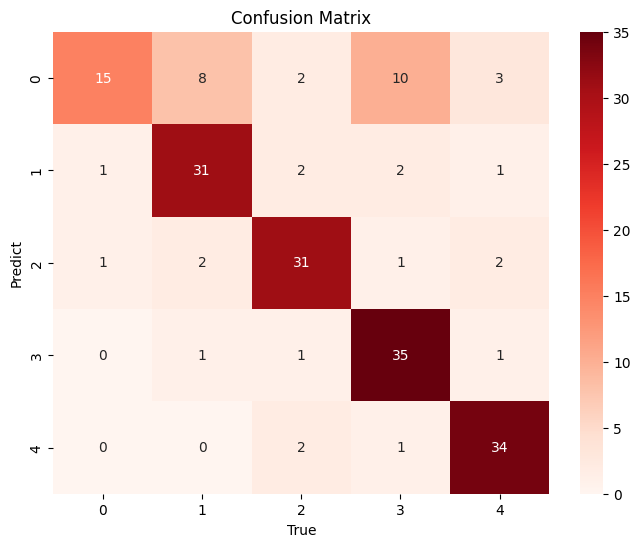

In [85]:
cm=confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix')
plt.xlabel("True")
plt.ylabel('Predict')
plt.show()

# Random Forest

In [86]:
# Membuat objek model Random Forest
rf_model = RandomForestClassifier()

# Menentukan ruang parameter
param_grid = {
    "n_estimators": [100, 200], # Jumlah estimators
    "max_depth": [ 10, 15], # Kedalaman maksimum pohon
    "min_samples_leaf": [1, 2], # Jumlah minimum sampel pada daun
    "min_samples_split": [2, 5], # Jumlah minimum sampel untuk membagi simpul internal
    "max_features": ["sqrt", "log2"], # jumlah fitur maksimum yang dipertimbangkan saat mencari pemisahan terbaik
    # "random_state": [42, 100, 200]
}

# Membuat objek RandomizedSearchCV
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

# Melakukan tuning
rf_model.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


Dari hasil di atas didapatkan parameter terbaik, yaitu:
1. n_estimators -> 100
2. min_samples_split -> 2
3. min_samples_leaf -> 2
4. max_features -> sqrt
5. max_depth -> 15

In [87]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.893
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        38
         1.0       0.84      0.86      0.85        37
         2.0       0.82      0.86      0.84        37
         3.0       0.92      0.95      0.94        38
         4.0       0.97      0.86      0.91        37

    accuracy                           0.89       187
   macro avg       0.90      0.89      0.89       187
weighted avg       0.90      0.89      0.89       187



In [88]:
evaluation(y_test_normal,y_pred_rf)


{'accuracy': 0.893, 'recall': 0.893, 'F1 score': 0.894, 'Precision score': 0.896}


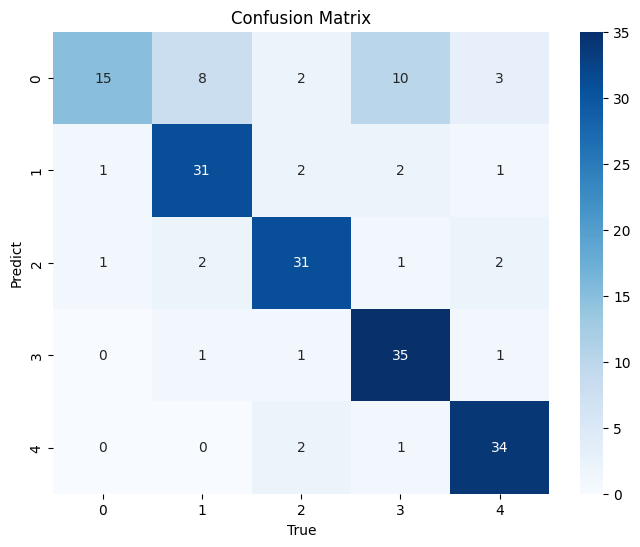

In [89]:
cm = confusion_matrix(y_test_normal, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBoost

In [90]:
# Membuat objek model XGBoost
xgb_model = XGBClassifier()

# Menentukan ruang parameter
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1], # tingkat pembelajaran
    "n_estimators": [100, 200],
    "gamma": [0, 0.1], # faktor pengurangan pemisahan simpul
    "colsample_bytree": [0.7, 0.8], # fraksi fitur yang dipertimbangkan pemisahan sampul
}

# Membuat objek RandomizedSearchCV
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

#Melakukan Tuning
xgb_model.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


Dari hasil diatas didapatkan parameter terbaik, yaitu:
1. n_estimators -> 100
2. max_depth -> 5
3. learning_rate -> 0.1
4. gamma -> 0.1
5. colsample_bytree -> 0.8

In [91]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.882
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.89      0.84      0.86        37
         2.0       0.83      0.81      0.82        37
         3.0       0.86      0.95      0.90        38
         4.0       0.94      0.89      0.92        37

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187



In [92]:
evaluation(y_test_normal,y_pred_xgb)


{'accuracy': 0.882, 'recall': 0.882, 'F1 score': 0.882, 'Precision score': 0.883}


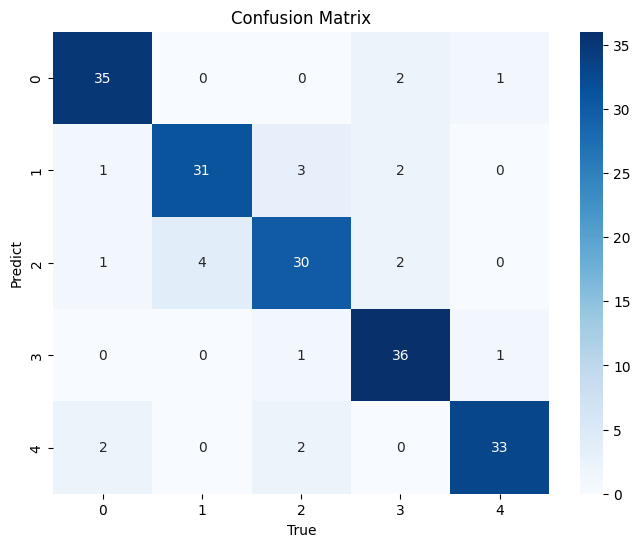

In [93]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# 8) Evaluasi

Setelah tahap membangun model, langkah selanjutnya adalah evaluasi. Dimana pada langkah ini akan dilakukan evaluasi data sekaligus membandingkan antar algoritma dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik

In [94]:
import matplotlib.pyplot as plt

Menampilkan hasil evaluasi dari data yang dilakukan SMOTE

In [95]:
# Membuat DataFrame
model_compl = pd.DataFrame({'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'], 'Accuracy':[accuracy_knn_smote*100, accuracy_rf_smote*100, accuracy_xgb_smote*100]})
model_compl.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


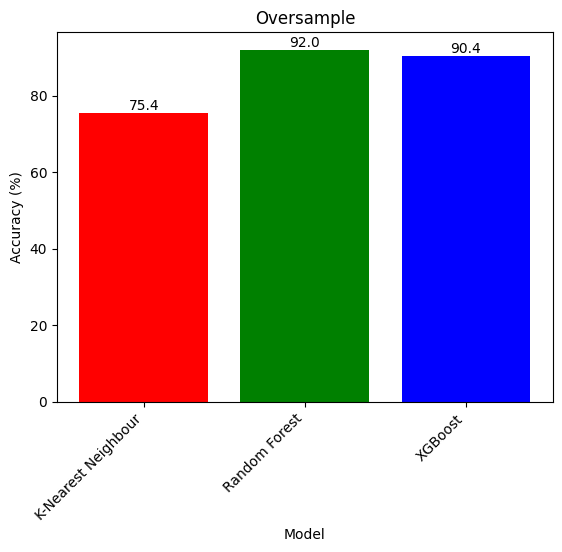

In [96]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compl['Model'], model_compl['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

#Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x()+bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')

plt.show()

Dari bar plot di atas, dapat dilihat bahwa **algoritma Random Forest dengan menggunakan SMOTE** mendapatkan hasil akurasi terbaik, yaitu **92.0**

Menampilkan hasil evaluasi dari data yang menggunakan Oversample (SMOTE) +Normalization

In [97]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                    'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
                    accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


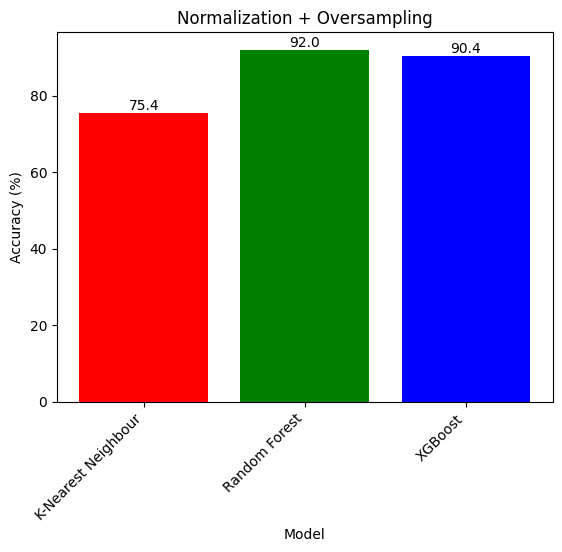

In [98]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Dari hasil bar plot di atas, dapat disimpulkan bahwa **Random Forest mendapatkan  hasil akurasi terbaik ketika menggunakan SMOTE dan Normalization** yaitu **92.0**

Menampilkan hasil evaluasi dari data yang menggunakan Tuning Oversample (SMOTE) + Normalization

In [99]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                    'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                    accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,78.1
1,Random Forest,89.3
2,XGBoost,88.2


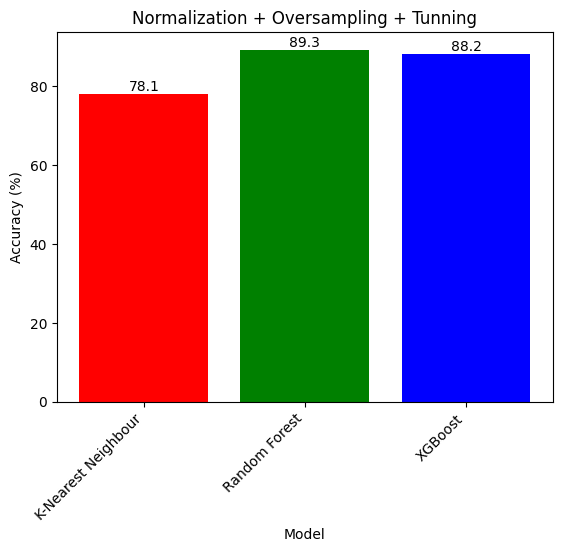

In [100]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Dari bar plot di atas didapatkan bahwa algoritma Random Forest lebih unggul dengan hasil akurasi **89.3** ketika **menggunakan data yang di Tuning, Oversample, dan Normalization.**

Kemudian akan dilakukan kompilasi dari model terbaik

In [103]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['Random Forest OverSample Standarization', 'Random Forest OverSample',
              'Random Forest OverSample Standarization Tunning'],
    'Accuracy': [accuracy_rf_smote_normal*100, accuracy_rf_smote*100,
                 accuracy_rf_smote_normal_Tun*100]
})

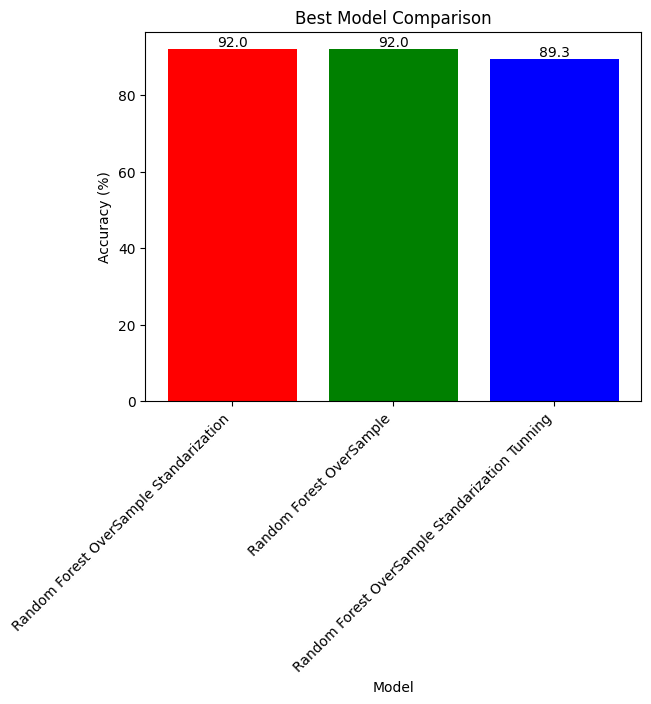

In [104]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# 9) Kesimpulan

Dari penelitian di atas, setelah dilakukan pemodelan menggunakan algoritma KNN, Random Forest, dan XGBoost dengan beberapa penanganan data, seperti menggunakan random oversampling SMOTE untuk mengatasi imbalance data, RandomSearchCV untuk tuning, dan Normalisasi data menggunakan MinMaxScaler. Dapat disimpulkan bahwa klasifikasi menggunakan Random Oversampling SMOTE pada model KNN menghasilkan akurasi 75.4%, model Random Forest dengan hasil akurasi 92%, dan model XGBoost menghasilkan akurasi sebesar 90.4%.

Kemudian untuk klasifikasi menggunakan data yang sudah dilakukan normalisasi dan SMOTE pada model KNN menghasilkan akurasi 75.4%, model Random Forest menghasilkan akurasi 92%, dan model XGBoost dengan hasil akurasi 90.4%. Dapat dilihat bahwa tidak ada perubahan antara penggunaan SMOTE dengan penggunaan Normalisasi dan SMOTE.

Terakhir untuk klasifikasi menggunakan data yang sudah dilakukan tuning, normalisasi, dan SMOTE pada model KNN menghasilkan akurasi 78.1%, model Random Forest dengan hasil akurasi 89.3%, dan model XGBoost dengan akurasi 88.2%.

Dengan itu, dalam penanganan data yang optimal untuk masalah imbalance data adalah dengan menggunakan metode SMOTE sekaligus dilengkapi dengan tuning dan normalisasi data. Hal ini dapat memberikan hasil yang signifikan dalam meningkatkan akurasi model klasifikasi, khususnya pada model KNN dan XGboost. Namun hal tersebut tidak terjadi pada model Random Forest yang mengalami penurunan akurasi.